<img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Logo_UTFSM.png" width="200" alt="utfsm-logo" align="left"/>

# MAT281
### Aplicaciones de la Matemática en la Ingeniería

## Proyecto 02: Free Style

### Instrucciones

* Completa tus datos personales (nombre y rol USM) en siguiente celda.
* Debes _pushear_ tus cambios a tu repositorio personal del curso.
* Como respaldo, debes enviar un archivo .zip con el siguiente formato `mXX_projectYY_apellido_nombre.zip` a alonso.ogueda@gmail.com, debe contener todo lo necesario para que se ejecute correctamente cada celda, ya sea datos, imágenes, scripts, etc.
* Se evaluará:
    - Soluciones
    - Código
    - Que Binder esté bien configurado.
    - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

__Nombre__:

__Rol__:

## Prediciendo _Pulsars_

Un púlsar (del acrónimo en inglés de pulsating star, que significa «estrella que emite radiación muy intensa a intervalos cortos y regulares») es una estrella de neutrones que emite radiación periódica. Los púlsares poseen un intenso campo magnético que induce la emisión de estos pulsos de radiación electromagnética a intervalos regulares relacionados con el periodo de rotación del objeto. [Wikipedia](https://es.wikipedia.org/wiki/P%C3%BAlsar).

![pulsar](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c9/Chandra-crab.jpg/600px-Chandra-crab.jpg)

_A composite image of the Crab Nebula showing the X-ray (blue), and optical (red) images superimposed. The size of the X-ray image is smaller because the higher energy X-ray emitting electrons radiate away their energy more quickly than the lower energy optically emitting electrons as they move._

### Descripción de los datos

In [32]:
!cat data/Readme.txt

******************************************************************************************

# HTRU2

Author: Rob Lyon, School of Computer Science & Jodrell Bank Centre for Astrophysics,
		University of Manchester, Kilburn Building, Oxford Road, Manchester M13 9PL.

Contact:	rob@scienceguyrob.com or robert.lyon@.manchester.ac.uk
Web:		http://www.scienceguyrob.com or http://www.cs.manchester.ac.uk
			or alternatively http://www.jb.man.ac.uk
******************************************************************************************

1. Overview

	HTRU2 is a data set which describes a sample of pulsar candidates collected during the
	High Time Resolution Universe Survey (South) [1]. 
	
	Pulsars are a rare type of Neutron star that produce radio emission detectable here on
	Earth. They are of considerable scientific interest as probes of space-time, the inter-
	stellar medium, and states of matter (see [2] for more uses). 
	
	As pulsars rotate, their emission beam sweeps across the sky, and 

### Objetivo

El objetivo es a partir de los datos, hacer la mejor predicción si un registro es un __pulsar__ o no. Para ellos es necesario realizar los pasos clásicos de un proyecto de _Machine Learning_, como estadística descriptiva, visualización y preprocesamiento. Sin embargo, se busca escoger el mejor modelo de clasificación con una métrica específica (_precision_).

* Se solicita ajustar tres modelos de clasificación, una regresión logística, KNN y un tercero a elección del siguiente [link](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) (es obligación escoger un _estimator_ que tenga por lo menos un hiperparámetro). 
* En los modelos que posean hiperparámetros es mandatorio buscar el/los mejores con alguna técnica disponible en `scikit-learn` ([ver más](https://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimator)).
* Para cada modelo, se debe realizar _Cross Validation_ con 10 _folds_ utilizando los datos de entrenamiento con tal de determinar un intervalo de confianza para el _score_ del modelo.
* Finalmente, realizar una predicción con cada uno de los tres modelos con los datos _test_ y obtener el _score_. 

En este informe __siempre__ debes utilizar _score_ / _scoring_ la métrica [_precision_](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score), tanto para el _Cross Validation_, _Hyper Parameter Tuning_ y _Prediction_. Toda la información al respecto de las métricas se encuentra [aquí](https://scikit-learn.org/stable/modules/model_evaluation.html#metrics-and-scoring-quantifying-the-quality-of-predictions). 

### Evaluación

Este jupyter notebook debe ser autocontenido, considera que es un informe técnico donde debes detallar cada paso, comentando código, utilizando variables con nombres adecuados, realizando gráficos y agregando apreciaciones personales cuando sea necesario. __No escatimes recursos a la hora de escribir.__

__Escenario:__ Te encuentras trabajando como _data scientist / data analyst / machine learning engineer / etc._ y este trabajo será presentado al resto del equipo, en especial a tu jefe directo. Todos tienen conocimiento del problema y de machine learning, por lo que no puedes pasar por alto los aspectos técnicos de tu desarrollo. __Al final del informe, debes entregar tus conclusiones, visualizaciones y apreciaciones personales.__

__Preguntas a responder:__

* ¿Cuál modelo tiene mejor _precision_?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?
* ¿Por qué utilizar _precision_ y no otro score?


### Rúbrica

* __Estadística Descriptiva__ (5 pts)
* __Visualización__ (10 pts)
* __Preprocesamineto__ (5 pts)
* __Regresión Logística__ (10 pts)
* __K Nearest Neighbours__ (15 pts)
* __Modelo a elección__ (15 pts)
* __Selección de Modelos__ (20 pts)
* __Conclusiones__ (20 pts)

## Contenidos

* [Estadística Descriptiva](#descr_stat)
* [Visualización](#visualization)
* [Preprocesamineto](#preprocessing)
* [Regresión Logística](#logistic)
* [K Nearest Neighbours](#knn)
* [Modelo a elección](#free-style)
* [Selección de Modelos](#model-selection)
* [Conclusiones](#conclusions)

In [33]:
import os
import numpy as np
import pandas as pd

In [34]:
df = pd.read_csv(
    os.path.join("data", "HTRU_2.csv"),
    header=None,
    names=[
        "mean_integrated_profile",
        "std_integrated_profile",
        "excess_kurtosis_integrated_profile",
        "skewness_integrated_profile",
        "mean_dmsnr",
        "std_dmsnr",
        "excess_kurtosis_dmsnr",
        "skewness_dmsnr",
        "is_pulsar",
    ]
)
df.head()

,mean_integrated_profile,std_integrated_profile,excess_kurtosis_integrated_profile,skewness_integrated_profile,mean_dmsnr,std_dmsnr,excess_kurtosis_dmsnr,skewness_dmsnr,is_pulsar
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


<a id='descr_stat'></a>

## Estadística Descriptiva

* Dar una pequeña definición de las columnas (_features_).
* Análisis descriptivo.
* Valores atípicos.
* Análisis específico a la variable _target_.

* Las columnas relacionadas con integrated_profile, muestran el promedio, la desviacion estandar,
la curtosis y la oblicuidad del las longitud determinada de señales que fueron promediadas tanto en tiempo como en frecuencia. Las columnas relacionadas con dmrst mide el promedio, la desviacion estandar,
la curtosis y la oblicuidad de la relacion (determinada con una curva) entre la dm y s/t.
La columna is_pulsar entrega una clasificacion, si los datos medidos corresponden a un pulsar, o no.
* La idea de que a partir de los datos que se entregan, determinar si a partir de los datos conseguidos anteriormente, se puede clasificar entre pulsar y no pulsar. La data tiene un total de 17897 donde 1,639 si son pulsar y 16,259 no lo son.
* Con un analisis rapido de los datos, no se puede determinar si existen datos atípicos en las 8 columnas de la Data. Por lo que se procederá a hacer un analisis de rango intercaurtil
* A simple vista, la variable target correspondiente a la columna is_pulsar, corresponde a una variable binaria que entrega una etiqueta, ya que clasifica a los datos en pulsar y no pulsar. 

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
mean_integrated_profile               17898 non-null float64
std_integrated_profile                17898 non-null float64
excess_kurtosis_integrated_profile    17898 non-null float64
skewness_integrated_profile           17898 non-null float64
mean_dmsnr                            17898 non-null float64
std_dmsnr                             17898 non-null float64
excess_kurtosis_dmsnr                 17898 non-null float64
skewness_dmsnr                        17898 non-null float64
is_pulsar                             17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


Podemos confirmar que no hay datos nulos y todos los datos son float64.

Ahora bien con la siguiente tabla podremos ver las caracteristicas de los datos (media, varianza) y ver que se puede analizar.

<a id='visualization'></a>

In [168]:
df.describe().T.drop(["count"],axis=1) #Visualizacion apriori de los datos 

,mean,std,min,25%,50%,75%,max
mean_integrated_profile,111.079968,25.652935,5.812500,100.929688,115.078125,127.085938,192.617188
std_integrated_profile,46.549532,6.843189,24.772042,42.376018,46.947479,51.023202,98.778911
excess_kurtosis_integrated_profile,0.477857,1.064040,-1.876011,0.027098,0.223240,0.473325,8.069522
skewness_integrated_profile,1.770279,6.167913,-1.791886,-0.188572,0.198710,0.927783,68.101622
mean_dmsnr,12.614400,29.472897,0.213211,1.923077,2.801839,5.464256,223.392140
std_dmsnr,26.326515,19.470572,7.370432,14.437332,18.461316,28.428104,110.642211
excess_kurtosis_dmsnr,8.303556,4.506092,-3.139270,5.781506,8.433515,10.702959,34.539844
skewness_dmsnr,104.857709,106.514540,-1.976976,34.960504,83.064556,139.309331,1191.000837
is_pulsar,0.091574,0.288432,0.000000,0.000000,0.000000,0.000000,1.000000


In [138]:
#Busqueda de outliers con rango intercuartil

Q1 = df.describe().T["25%"] #Cuartil 1
Q3 = df.describe().T["75%"] # Cuartil 3
RIQ = Q3 - Q1 #Rango intercuartil
LI = Q1 - 3*RIQ #Limite inferior
LS = Q3 + 3*RIQ #Limite superior

#Me regresa la cantidad de datos que estan fuera de los limites 
for name in df.columns:
    if name != "is_pulsar":
        n_out = len(df[[name]].loc[(df[name] < LI[name])|(df[name] > LS[name])])
        total = len(df[name])
        porc = round((n_out/float(total))*100,2)
        print(f"Outliers en {name} : {n_out} de un total de {total} datos")
        print(f"Porcentaje de outliers sobre el total: {porc} % \n")
    


Outliers en mean_integrated_profile : 233 de un total de 17898 datos
Porcentaje de outliers sobre el total: 1.3 % 

Outliers en std_integrated_profile : 26 de un total de 17898 datos
Porcentaje de outliers sobre el total: 0.15 % 

Outliers en excess_kurtosis_integrated_profile : 1202 de un total de 17898 datos
Porcentaje de outliers sobre el total: 6.72 % 

Outliers en skewness_integrated_profile : 1280 de un total de 17898 datos
Porcentaje de outliers sobre el total: 7.15 % 

Outliers en mean_dmsnr : 2428 de un total de 17898 datos
Porcentaje de outliers sobre el total: 13.57 % 

Outliers en std_dmsnr : 1111 de un total de 17898 datos
Porcentaje de outliers sobre el total: 6.21 % 

Outliers en excess_kurtosis_dmsnr : 51 de un total de 17898 datos
Porcentaje de outliers sobre el total: 0.28 % 

Outliers en skewness_dmsnr : 272 de un total de 17898 datos
Porcentaje de outliers sobre el total: 1.52 % 



Al analizar los datos outliers, se puede ver que la columna con más problemas es la de outliers es el de "mean_dmsnr", ya que el 13.57% de sus datos son outliers así que se analizará en detalle esa columna

In [143]:
df.describe()[["mean_dmsnr"]].T #Analizamos su varianza y sus cuartiles 

,count,mean,std,min,25%,50%,75%,max
mean_dmsnr,17898.0,12.6144,29.472897,0.213211,1.923077,2.801839,5.464256,223.39214


In [155]:
print(f"Liminte superior de 'mean_dmsnr' es : {round(LS['mean_dmsnr'],2)}")

Liminte superior de 'mean_dmsnr' es : 16.09


Al ver esto, podemos ver que el maximo valor es 223.39, su limite superior es de 16.06, y posee una desviacion estandar de 29.47 y una media de 12.61 muy cercano al limite superior, por lo que es de esperar que gran parte del 25% de los datos restantes sean outliers.

## Visualización

* Histogramas.
* Scatter matrix coloreando por el _target_.
* Mapa de calor con correlación entre variables.

Puedes utilizar `matplotlib` o `altair`, como sea de tu preferencia.

In [39]:
import altair as alt
import matplotlib.pyplot as plt

alt.themes.enable("opaque")

%matplotlib inline

In [78]:
df_url = os.path.join("data", "HTRU_2-Copy1.json")
df.to_json(df_url, orient="records")
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [87]:
source = df.rename(new_names,axis=1)

In [41]:
new_names = { 
    "mean_integrated_profile":"promedio de perfil integrado",
    "std_integrated_profile": "desviacion estandar de perfil integrado",
    "excess_kurtosis_integrated_profile": "exceso de kurtosis de perfil integrado",
    "skewness_integrated_profile": "oblicuidad de perfil integrado",
    "mean_dmsnr": "promedio de dmsnr",
    "std_dmsnr": "desviacion estandar de dmsnr",
    "excess_kurtosis_dmsnr": "exceso de kurtosis de dmsnr",
    "skewness_dmsnr": "oblicuidad de dmsnr",
    "is_pulsar": "es pulsar"
}


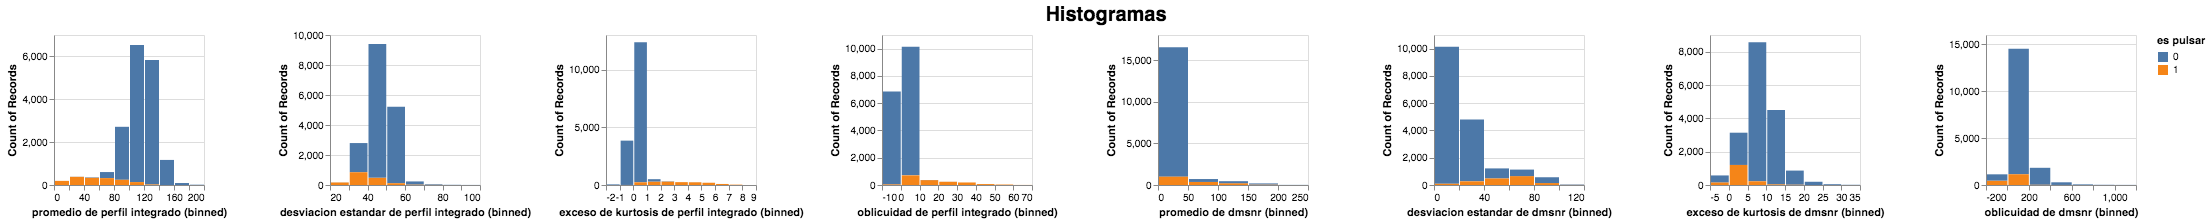

In [91]:
alt.Chart(source).mark_bar().encode(
    alt.X(alt.repeat("column"),type="quantitative",bin=True),
    alt.Y("count()",type="quantitative"),
    alt.Color("es pulsar:N")
).properties(
    width = 150,
    height= 150
).repeat(
    column = list(new_names.values())[:-1],
    title=alt.TitleParams(text='Histogramas', align='center', anchor='middle',fontSize=20)
)

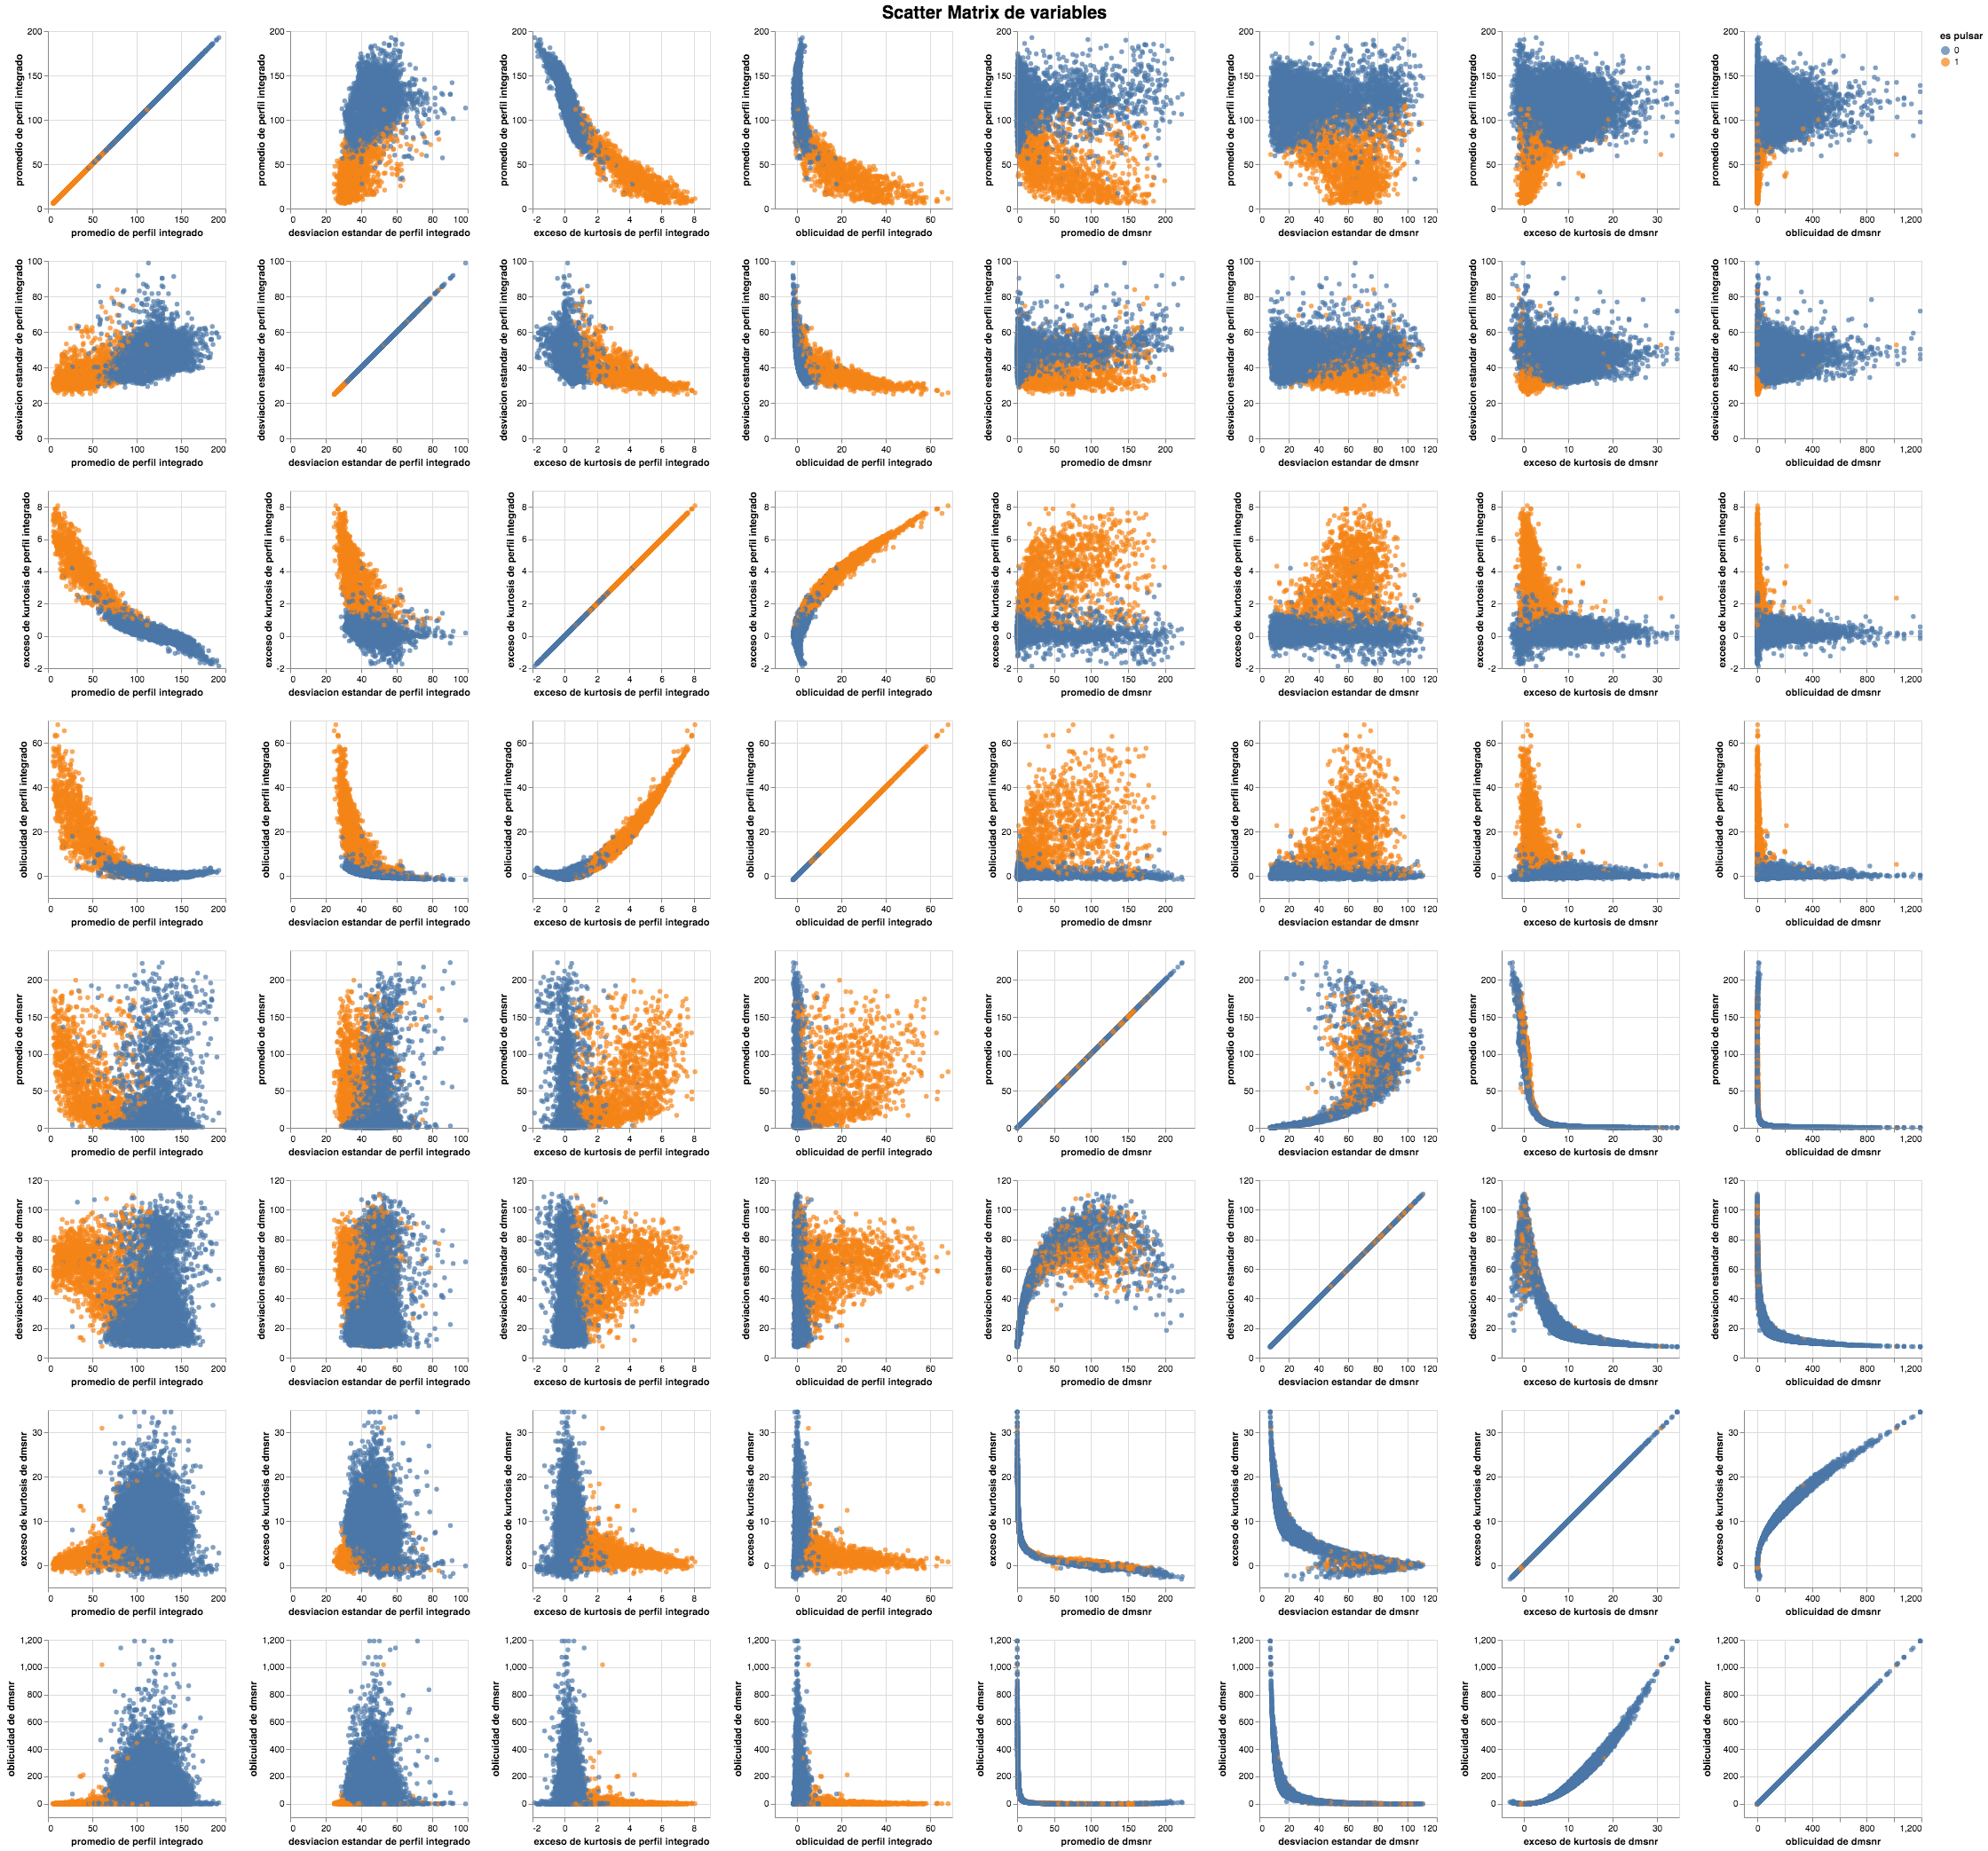

In [90]:
source = df.rename(new_names,axis=1)
alt.Chart(source).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    alt.Color("es pulsar:N",title = new_names["is_pulsar"])
    ).properties(
        width=200,
        height=200
    ).repeat(
        row=list(new_names.values())[:-1],
        column=list(new_names.values())[:-1],
        title=alt.TitleParams(text='Scatter Matrix de variables', align='center', anchor='middle',fontSize=20)
)

In [44]:

#FALTAN MAPAS DE CALOR



<a id='preprocessing'></a>

## Preprocesamiento

Es hora de preparar los datos para la selección de modelos. Se solicita que:

* Crear el _numpy.array_ `X_raw` con las columnas predictoras de `df`.
* Crear el _numpy.array_ `y` con la columna a predecir de `df`.
* Definir un _transformer_ `StandarScaler` declarado como `scaler`, luego ajustar con los datos de `X_raw`.
* Definir el _numpy.array_ `X` luego de transformar los datos de `X_raw` con `scaler`. Verificar que tenga media nula y desviación estándar unitaria.
* Dividir la data en _train_ (90%) y _test_ (10%) utilizando como argumento `random_state=42`.

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [46]:
X_raw = df.drop(columns = "is_pulsar").values
y = df["is_pulsar"].values

In [47]:
scaler = StandardScaler()
X = scaler.fit_transform(X_raw)
print(f"Media = {X.mean(axis=0).round(3)} \n")
print(f"Desviacion estandar = {X.std(axis=0)}")

Media = [-0. -0.  0.  0. -0.  0.  0.  0.] 

Desviacion estandar = [1. 1. 1. 1. 1. 1. 1. 1.]


In [48]:
## FREE STYLE ##

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.9,test_size=0.1, random_state = 42)

<a id='logistic'></a>

## Regresión Logística

Utiliza la función `cross_validate` con el estimador `logistic` para realizar una estimación del _score_

In [63]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

In [64]:
logistic = LogisticRegression().fit(X_train,y_train)
logistic_cv = cross_validate(logistic,X_test,y_test,scoring="precision",cv=10)

In [65]:
print(f'Logistic Regression Cross Validation precision score: {np.mean(logistic_cv["test_score"]):.5f} +/- {np.std(logistic_cv["test_score"]):.5f}')

Logistic Regression Cross Validation precision score: 0.94391 +/- 0.06790


In [67]:
logistic.fit(X_test,y_test)
logistic.score(X_test,y_test)

0.9810055865921787

<a id='knn'></a>

## K Nearest Neighbours

Utiliza `GridSearchCV` para encontrar el mejor valor de `n_neighbors`. Luego, con el mejor _estimator_ de `knn` realiza la validación cruzada para obtener el intervalo de confianza del _score_.

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [56]:
## FIX ME ##
k_array = np.arange(2,20)
digits_gscv = GridSearchCV(estimator=KNeighborsClassifier(),param_grid={"n_neighbors":k_array},cv=10,scoring="precision")
digits_gscv.fit(X_train,y_train)
knn = digits_gscv.best_params_
knn #Se demora mucho en cargar, testear poco

{'n_neighbors': 2}

In [25]:
## FRE STYLE ##

In [182]:
kneigh = KNeighborsClassifier(n_neighbors=knn["n_neighbors"])
kneigh.fit(X_train,y_train)
knn_cv = cross_validate(kneigh,X_test,y_test,cv=10,scoring="precision")

In [183]:
print(f'KNN Cross Validation precision score: {round(np.mean(knn_cv["test_score"]),5):.2f} +/- {round(np.std(knn_cv["test_score"]),5):.2f} with train data.')

KNN Cross Validation precision score: 0.97 +/- 0.04 with train data.


<a id='free_style'></a>

## Modelo a elección

* Escoge un modelo de clasificación de [aquí](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) que por lo menos tenga un hiperparámetro, por ejemplo, [sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) tiene el parámetro de regularización `C`.
* Explica en uno o dos párrafos en qué consiste el algoritmo/modelo.
* Al igual que KNN, encuentra el/los mejores valores para los hiperparámetros.
* Con el mejor estimador realiza _Cross Validation_ con los datos de entrenamiento.
* Calcula el intervalo de confianza de _precision_.

El modelo a elegir es un arbol de decisión de clasificación DecisionTreeClassifier, cuyo hiperparámetro es max_depth que es la máxima profundidad de expansión del árbol. Si bien a priori, uno podria pensar que el arbol de decisión está perfecto si este se expande lo máximo posible, en la práctica, la máxima expansión podría causar un sobreajuste del modelo causando que los algunos datos queden mal clasificados, por ello, se propone como hiperparámetro

In [169]:
from sklearn.tree import DecisionTreeClassifier

param = {"max_depth":[None]+list(np.arange(1,20))}
params_gscv = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param,cv=10,scoring="precision").fit(X_train,y_train)
params_gscv.best_params_

{'max_depth': 3}

Con el resultado anterior, es posible suponer que 3 es un buen numero optimo para cualquier arbol, sin embargo con los ejemplo de abajo mostraremos que no siempre es asi.

In [112]:
GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param,cv=5,scoring="precision").fit(X_train,y_train).best_params_

{'max_depth': 1}

In [157]:
GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param,cv=5,scoring="precision").fit(X_train,y_train).best_params_

{'max_depth': 5}

Con esto podemos ver que el parametro max_depth no siempre es bueno dejarlo en None.

In [161]:
my_model = DecisionTreeClassifier(max_depth = params_gscv.best_params_["max_depth"])
my_model_cv = cross_validate(my_model,X_test,y_test,cv=10,scoring="precision")
my_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [170]:
print(f'MY MODEL Cross Validation precision score: {np.mean(my_model_cv["test_score"]):.2f} +/- {np.std(my_model_cv["test_score"]):.2f} with train data.')

MY MODEL Cross Validation precision score: 0.93 +/- 0.06 with train data.


<a id='model_selection'></a>

## Selección de Modelo

* Compara la _precision_ entre cada uno de los modelos.
* Grafica la matriz de confusión para cada uno de los modelos.
* Calcula un intervalo de confianza del tiempo utilizado en el ajuste de cada modelo. Ver documentación de `cross_validate`.
* Gráficos o reportes adicionales.

In [175]:
from sklearn.metrics import precision_score, classification_report

In [184]:
print(f'Logistic Regression test precision score: {precision_score(y_test,logistic.predict(X_test))}')

Logistic Regression test precision score: 0.9424460431654677


In [185]:
print(f'KNN test precision score: {precision_score(y_test,kneigh.predict(X_test))}')

KNN test precision score: 0.9496402877697842


In [186]:
print(f'MY MODEL test precision score: {precision_score(y_test,my_model.predict(X_test))}')

MY MODEL test precision score: 0.9492753623188406


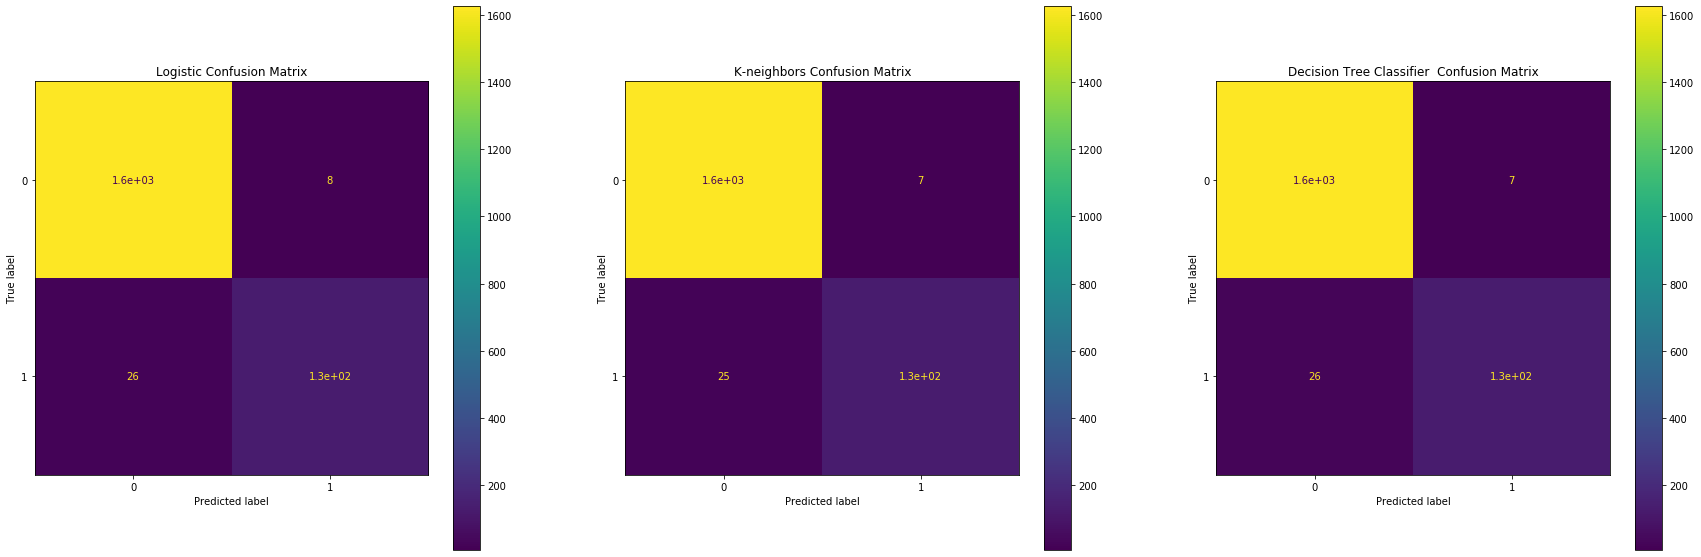

In [218]:
from sklearn.metrics import plot_confusion_matrix

fig,(ax1, ax2,ax3)= plt.subplots(1,3,figsize=(30,10))
plot_confusion_matrix(logistic,X_test,y_test,ax=ax1)
ax1.set_title('Logistic Confusion Matrix')
plot_confusion_matrix(kneigh,X_test,y_test,ax=ax2)
ax2.set_title('K-neighbors Confusion Matrix')
plot_confusion_matrix(my_model,X_test,y_test,ax=ax3)
ax3.set_title('Decision Tree Classifier  Confusion Matrix')

plt.show()

INTERVALOS

In [216]:
logistic_train_cv = cross_validate(logistic,X_train,y_train,scoring="precision",cv=10)
kneigh_train_cv = cross_validate(kneigh,X_train,y_train,scoring="precision",cv=10)
my_model_train_cv = cross_validate(my_model,X_train,y_train,scoring="precision",cv=10)

In [217]:
print(f'Logistic Regression Cross Validation fitting time: {np.mean(logistic_train_cv["fit_time"]):.5f} +/- {np.std(logistic_train_cv["fit_time"]):.5f}')
print(f'KNN Cross Validation fitting time: {np.mean(kneigh_train_cv["fit_time"]):.5f} +/- {np.std(kneigh_train_cv["fit_time"]):.5f}')
print(f'Decision Tree Classifier Cross Validation fitting time: {np.mean(my_model_train_cv["fit_time"]):.5f} +/- {np.std(my_model_train_cv["fit_time"]):.5f}')

Logistic Regression Cross Validation fitting time: 0.05981 +/- 0.00636
KNN Cross Validation fitting time: 0.01187 +/- 0.00251
Decision Tree Classifier Cross Validation fitting time: 0.04354 +/- 0.00318


In [222]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


In [223]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

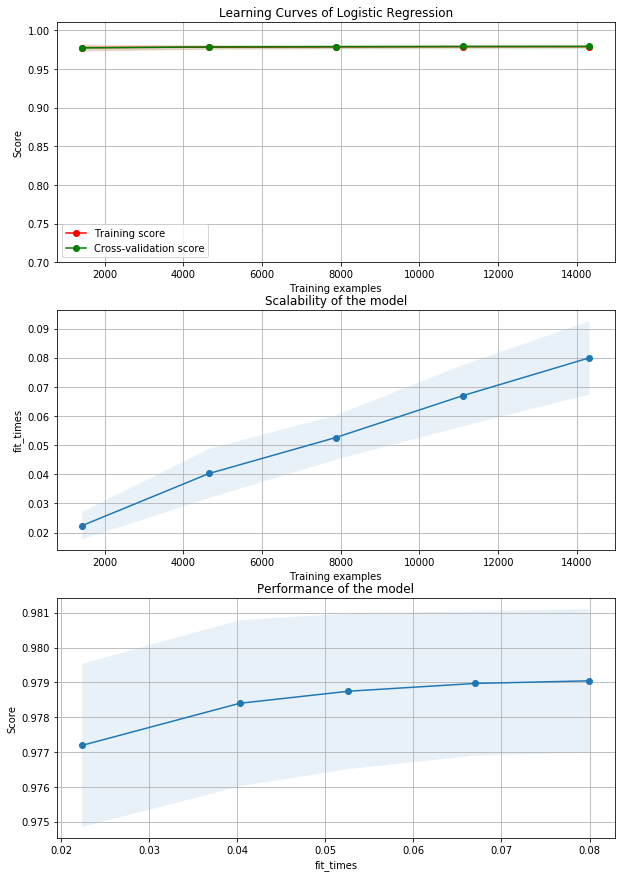

In [224]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

title = "Learning Curves of Logistic Regression"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = logistic
plot_learning_curve(estimator, title, X, y, axes=axes, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

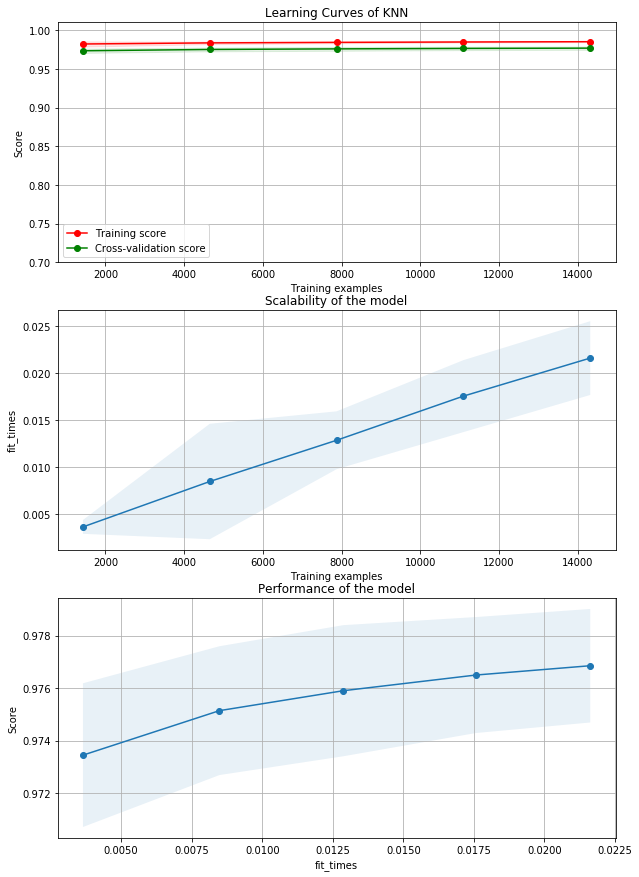

In [225]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

title = "Learning Curves of KNN"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = kneigh
plot_learning_curve(estimator, title, X, y, axes=axes, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

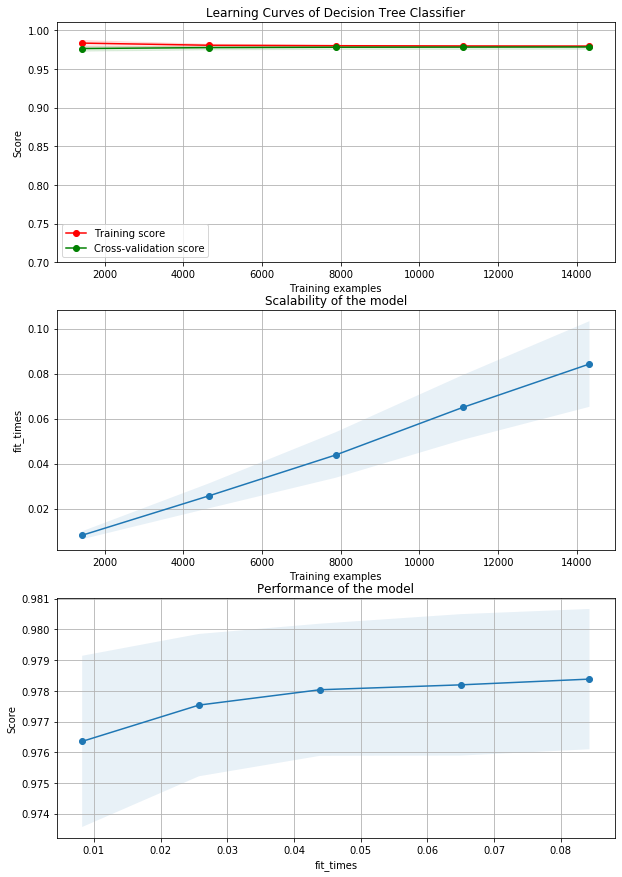

In [226]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

title = "Learning Curves of Decision Tree Classifier"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = my_model
plot_learning_curve(estimator, title, X, y, axes=axes, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

<a id='conclusions'></a>

## Conclusiones

Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultados, etc.

En este caso, el metodo KNN es el metodo que tiene mejor score y se demora menos que los otros modelos por lo que 
se escoge ese modelo para la clasificación de la variable objetivo. 



¿Cuál modelo tiene mejor precision?

El modelo KNN tiene mejor precision

¿Cuál modelo demora menos tiempo en ajustarse?

Tambien el KNN, tiene un tiempo muy bajo en comparación a los otros

¿Qué modelo escoges?

Dado que se demora menos y tiene muy buen ajuste, escojo el KNN. Ademas por los graficos se nota que tiene mayor escalabilidad

¿Por qué utilizar precision y no otro score?

Este clasifica de forma binaria a los datos, lo que mejora la rapidez a la hora de valga la redundancia clasificar datos.